### **Mounting From Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Importing Libraries**

In [2]:
!pip install fuzzywuzzy

In [3]:
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

from gensim.models import KeyedVectors
from fuzzywuzzy import process

/usr/local/lib/python3.11/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [4]:
import gensim.downloader as api
path = api.load("word2vec-google-news-300", return_path=True)
print(path)

[==================================================] 100.0% 1662.8/1662.8MB downloaded
/root/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz


### **Reading The csv Files**

In [5]:
path_train = "/content/drive/MyDrive/Colab Notebooks/SentimentalAnalysis/train_data.csv"
path_brand = "/content/drive/MyDrive/Colab Notebooks/SentimentalAnalysis/title_brand.csv"
df = pd.read_csv(path_train)
df_brand = pd.read_csv(path_brand)

<ipython-input-5-016e3278c66f>:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path_train)


### **Data Understanding**

In [6]:
pd.set_option('display.max_rows', None)  # To display all rows
pd.set_option('display.max_columns', None)  # To display all columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838944 entries, 0 to 838943
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   overall         838944 non-null  int64 
 1   vote            191468 non-null  object
 2   verified        838944 non-null  bool  
 3   reviewTime      838944 non-null  object
 4   reviewerID      838944 non-null  object
 5   asin            838944 non-null  object
 6   style           490613 non-null  object
 7   reviewerName    838717 non-null  object
 8   reviewText      838944 non-null  object
 9   summary         838868 non-null  object
 10  unixReviewTime  838944 non-null  int64 
dtypes: bool(1), int64(2), object(8)
memory usage: 64.8+ MB


In [8]:
df['verified'].value_counts()

,count
verified,
True,720389
False,118555


In [9]:
df = df[df['verified'] == True]

In [10]:
df.head(20)

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime
1,5,NaN,True,2016-06-06,A2NETQRG6JHIG7,0511189877,NaN,Qrysta White,First time I've EVER had a remote that needed ...,zero programming needed! Miracle!?,1465171200
2,4,NaN,True,2016-03-10,A12JHGROAX49G7,0511189877,NaN,Linwood,Got them and only 2 of them worked. company ca...,Works Good and programs easy.,1457568000
3,5,NaN,True,2016-01-14,A1KV65E2TMMG6F,0511189877,NaN,Dane Williams,I got tired of the remote being on the wrong s...,Same as TWC remote,1452729600
4,5,NaN,True,2016-10-20,A280POPEWI0NSA,0594459451,NaN,Kristina H.,After purchasing cheap cords from another webs...,Good Quality Cord,1476921600
5,5,NaN,True,2016-06-18,A2KTAT1Y3VRVSJ,0594459451,NaN,MnMMom3,This is a great charging cable for the Nook. ...,Better than original charger!,1466208000
6,5,NaN,True,2016-02-11,A1CHTT6E3NV5YL,0594459451,NaN,Amazon Shopper,The 90 degree connector is a bonus that allows...,Works great on my Wife's older model Nook Color.,1455148800
7,2,NaN,True,2016-04-02,A1TI6WQ69ST707,0594481902,NaN,kyle,I bought this thinking it would be a great rep...,Good enough to charge and wipe an older nook b...,1459555200
8,4,NaN,True,2016-01-10,A38NYFVE0FCZRG,0594481902,NaN,S. Artist,It works! I was skeptical about ordering it b...,"It works, but it costs $30! Generic USB wall ...",1452384000
9,5,NaN,True,2016-09-19,A2LLAAYS88V96P,0594296420,NaN,Tabatha,Brand name adapter this is just like the one y...,Brand name adapter this is just like the one y...,1474243200
10,5,NaN,True,2016-09-03,A1CGJVDE638R1C,0594296420,NaN,Estabot MK.3000,I would like to say this product works just fi...,I would like to say this product works just fine,1472860800


In [11]:
df_brand.head(20)

,asin,title,brand
0,0011300000,Genuine Geovision 1 Channel 3rd Party NVR IP S...,GeoVision
1,0043396828,"Books ""Handbook of Astronomical Image Processi...",33 Books Co.
2,0060009810,One Hot Summer,Visit Amazon's Carolina Garcia Aguilera Page
3,0060219602,Hurray for Hattie Rabbit: Story and pictures (...,Visit Amazon's Dick Gackenbach Page
4,0060786817,sex.lies.murder.fame.: A Novel,Visit Amazon's Lolita Files Page
5,0070524076,College Physics,Visit Amazon's Alan Giambattista Page
6,0091912407,Girl with a One-track Mind: Confessions of the...,ABBY LEE
7,0101635370,abcGoodefg&reg; 4GB USB 2.0 Mp3 Music Player w...,Crazy Cart
8,0132492776,Wireless Bluetooth Headphones Earbuds with Mic...,Enter The Arena
9,0132793040,Kelby Training DVD: Mastering Blend Modes in A...,Kelby Training


<Axes: >

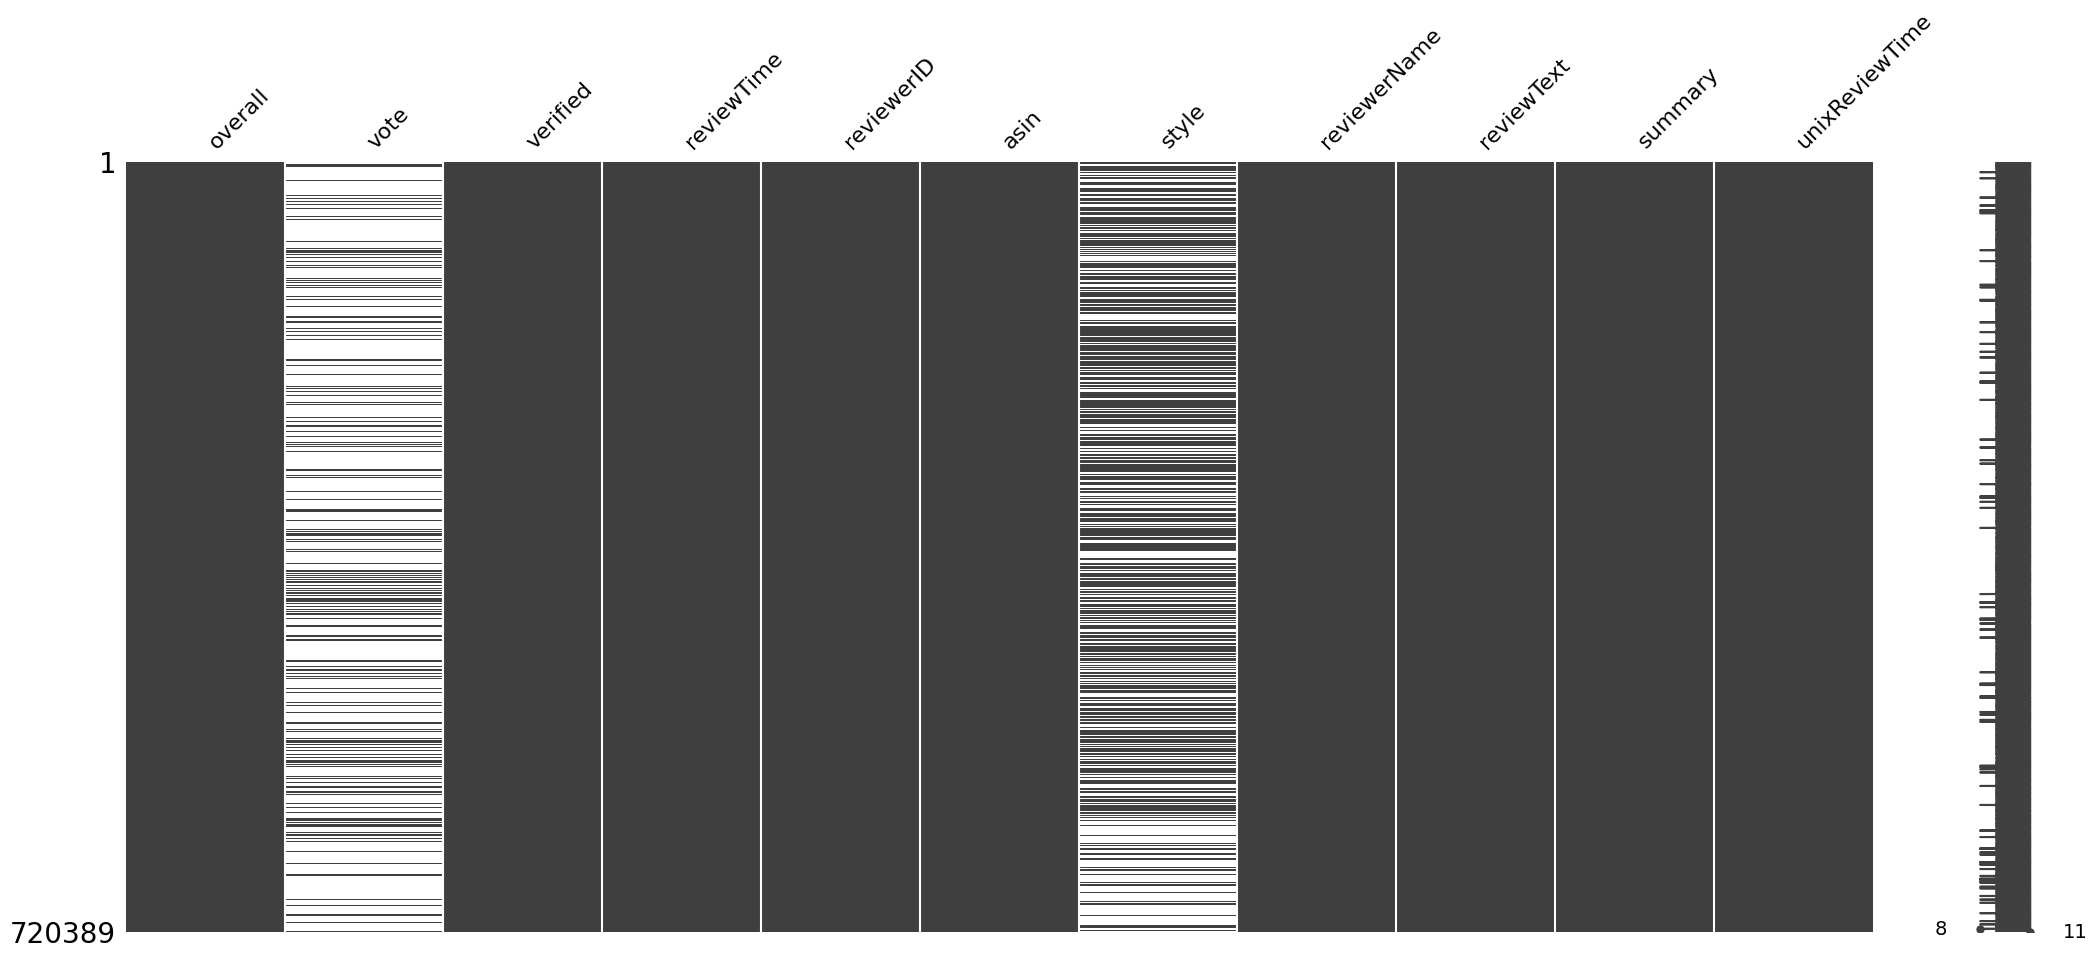

In [12]:
msno.matrix(df)

<Axes: >

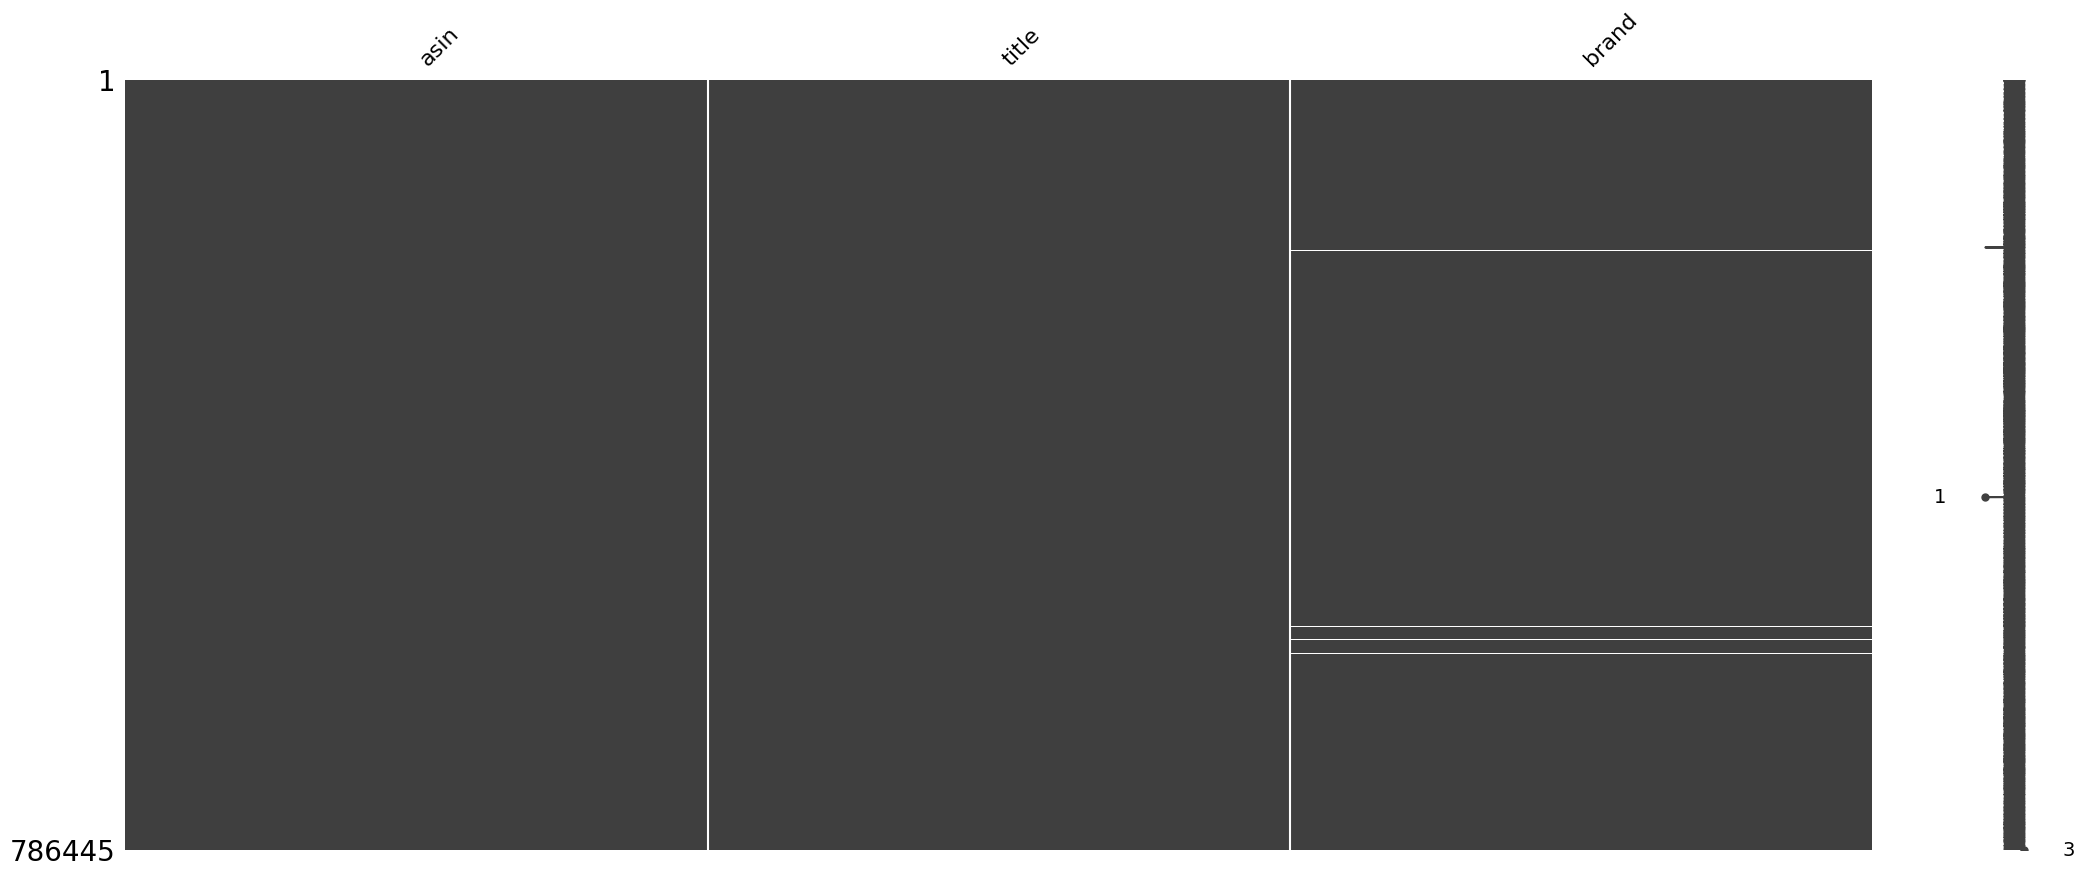

In [13]:
msno.matrix(df_brand)

### **Analysis**

#### **Task 1**

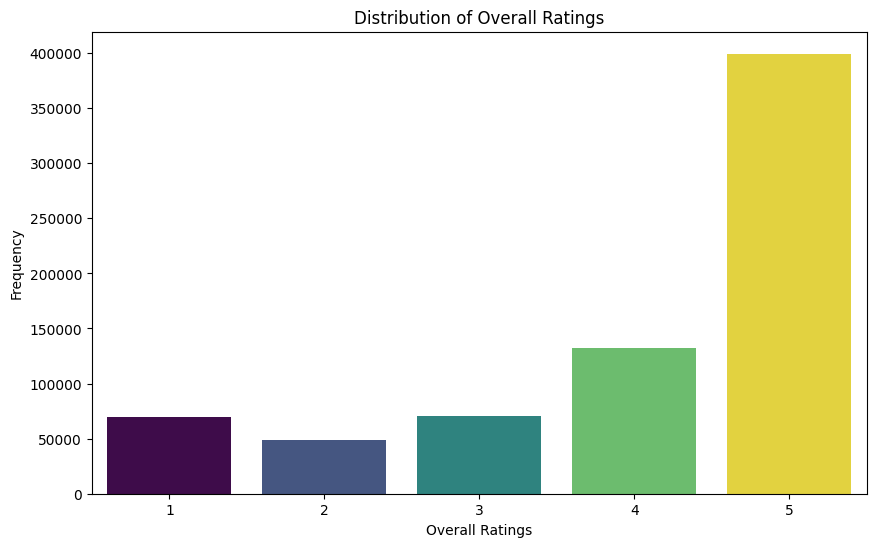

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='overall', data=df, hue='overall', palette='viridis', legend=False)
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Ratings')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=[1, 2, 3, 4, 5])
plt.show()

#### **Task 2**

In [15]:
positive_comments = df[df['overall'] >= 4]['reviewText']
neutral_comments = df[df['overall'] == 3]['reviewText']
negative_comments = df[df['overall'] <= 2]['reviewText']

In [16]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
def generate_wordcloud(comments, title):
    text = ' '.join(comments)
    wordcloud = WordCloud(width=800, height=400,
                          background_color='white',
                          stopwords=stop_words,
                          collocations=False).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

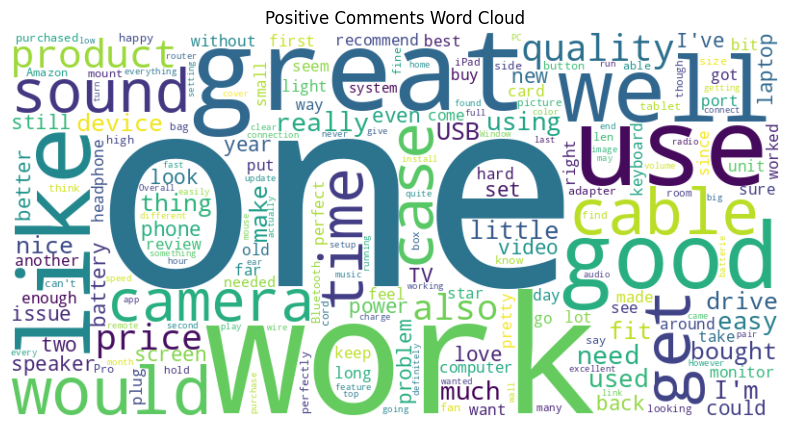

In [18]:
generate_wordcloud(positive_comments, 'Positive Comments Word Cloud')

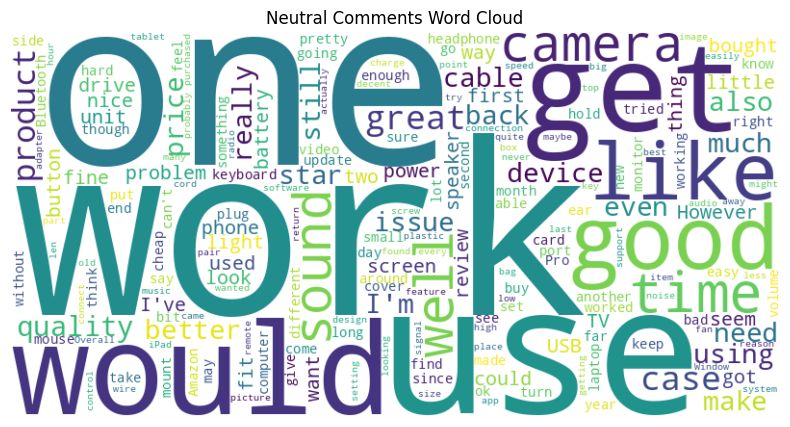

In [19]:
generate_wordcloud(neutral_comments, 'Neutral Comments Word Cloud')

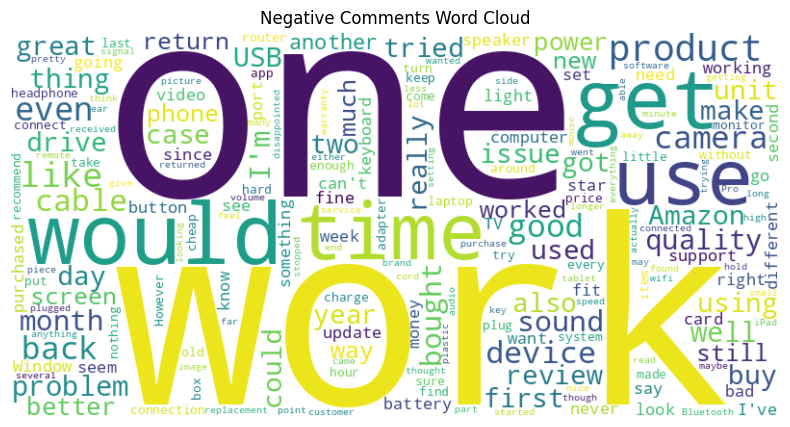

In [20]:
generate_wordcloud(negative_comments, 'Negative Comments Word Cloud')

#### **Task 3**

In [21]:
df['vote'] = df['vote'].fillna(0)
df['vote'] = pd.to_numeric(df['vote'], errors='coerce')
top_voters = df.groupby('reviewerID')['vote'].sum().reset_index()
top_voters = top_voters.sort_values(by='vote', ascending=False)
top_10_voters = top_voters.head(10)

print(top_10_voters)

            reviewerID    vote
91522   A25GROL6KJV3QG  4572.0
242244   A9K7V1MKJ9BOJ  1337.0
299906   AZPCDY9OQ605E  1045.0
96809   A27UX6C43JYPOT   976.0
234405   A5YWF3BZZYR95   937.0
137048  A2Q4FGPUE3B8V7   933.0
40216   A1I7GW7XZNGTF2   918.0
294842   AXDVANLIPLRDL   884.0
148123  A2V7P952VCUC51   836.0
184223  A3BHELYPYKNB5W   833.0


#### **Task 4**

In [22]:
df['text_length'] = df['reviewText'].str.len()

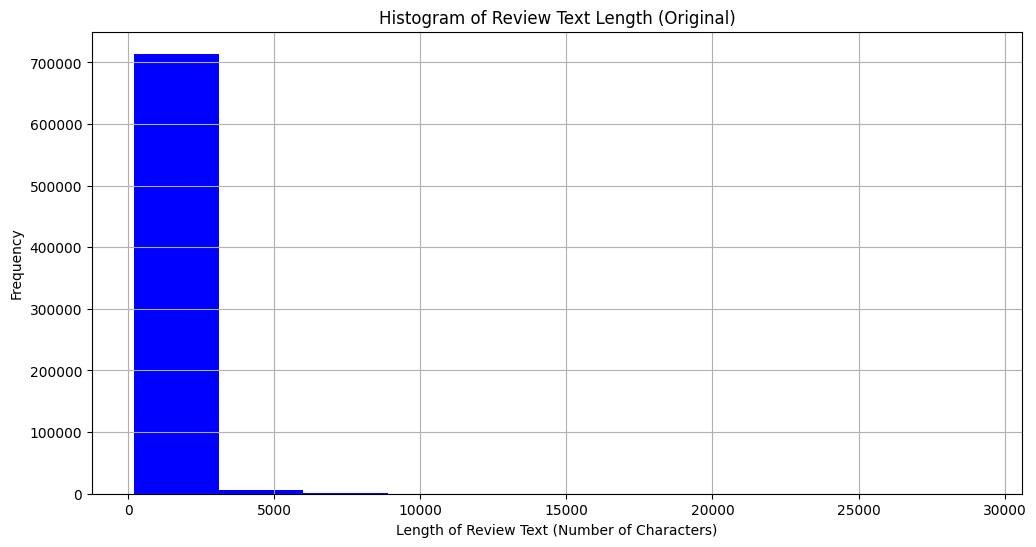

In [23]:
plt.figure(figsize=(12, 6))
plt.hist(df['text_length'], bins=10, color='blue')
plt.title('Histogram of Review Text Length (Original)')
plt.xlabel('Length of Review Text (Number of Characters)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

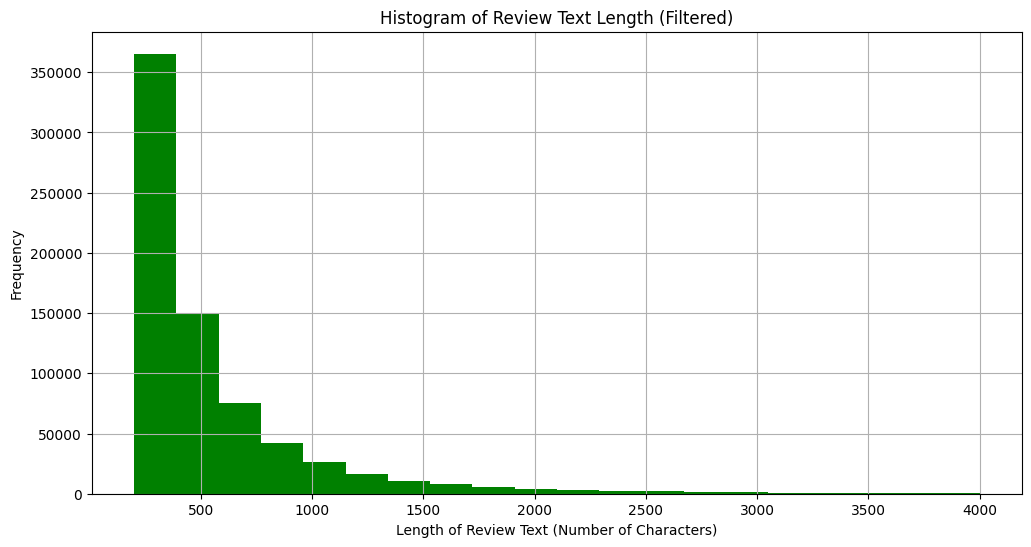

In [24]:
filtered_df = df[(df['text_length'] >= 200) & (df['text_length'] <= 4000)]

plt.figure(figsize=(12, 6))
plt.hist(filtered_df['text_length'], bins=20, color='green')
plt.title('Histogram of Review Text Length (Filtered)')
plt.xlabel('Length of Review Text (Number of Characters)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### **Task 5**

In [46]:
df[df['style'].notna()]['style'].head(10)

,style
17,{'Format:': ' Spiral-bound'}
18,{'Format:': ' Spiral-bound'}
19,{'Format:': ' Spiral-bound'}
20,{'Format:': ' Kindle Edition'}
38,{'Color:': ' Black'}
39,{'Color:': ' Black'}
41,{'Color:': ' Black'}
42,{'Color:': ' Black'}
44,{'Color:': ' Black'}
45,{'Color:': ' Black'}


In [26]:
merged_df = pd.merge(df, df_brand, how='left', on='asin')

In [27]:
five_star_reviews = merged_df[merged_df['overall'] == 5]

top_five_star_products = five_star_reviews.groupby(['brand', 'title']).size().reset_index(name='number_of_5_star_reviews')
top_five_star_products = top_five_star_products.sort_values(by='number_of_5_star_reviews', ascending=False)
top_five_star_products = top_five_star_products[['brand', 'title', 'number_of_5_star_reviews']]  # Corrected line
top_10_products = top_five_star_products.head(10)

In [28]:
top_10_products

,brand,title,number_of_5_star_reviews
10194,Cambridge Soundworks,OontZ Angle 3 Enhanced Stereo Edition IPX5 Spl...,1120
36716,NETGEAR,NETGEAR N300 WiFi Range Extender (EX2700),617
52584,StarTech,StarTech USB 2.0 to SATA IDE Adapter (USB2SATA...,566
45791,Roku,Roku Streaming Stick (3600R) - HD Streaming Pl...,542
47716,Samsung,Samsung 850 EVO 500GB 2.5-Inch SATA III Intern...,516
31950,Logitech,Logitech M570 Wireless Trackball Mouse &ndash;...,511
4696,Asus,ASUS Tri-Band Gigabit (AC3200) WiFi Router (Up...,432
59016,VideoSecu,VideoSecu ML531BE TV Wall Mount for Most 27&qu...,420
47713,Samsung,Samsung 850 EVO 250GB 2.5-Inch SATA III Intern...,420
36673,NETGEAR,NETGEAR 5-Port Gigabit Ethernet Unmanaged Swit...,406


#### **Task 6**

In [29]:
brand_stats = merged_df.groupby('brand').agg(
    number_of_reviews=('overall', 'size'),
    average_rating=('overall', 'mean')
).reset_index()

top_brands = brand_stats.sort_values(by='number_of_reviews', ascending=False)
top_10_brands = top_brands.head(10)

In [30]:
top_10_brands[['brand', 'average_rating']]

,brand,average_rating
6940,Logitech,3.997765
10036,Samsung,4.038300
768,AmazonBasics,4.186427
1058,Asus,3.900934
10518,Sony,4.013108
862,Anker,4.252065
11085,TP-LINK,3.917305
10041,SanDisk,4.000262
9988,Sabrent,4.006189
7863,NETGEAR,3.839952


### **Satisfaction**

#### **Loading The Model**

In [31]:
model = KeyedVectors.load_word2vec_format('/root/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz', binary=True)

#### **Common Typos**

In [32]:
typical_typos = {
    'guarantee': ['guaruntee', 'garantee', 'guarentee'],
    'warranty': ['warrenty', 'warantee', 'warrantee', 'waranty']
}

In [33]:
def find_typos(word, candidates, threshold=80):
    matches = process.extract(word, candidates, limit=10)
    return [match[0] for match in matches if match[1] >= threshold]

#### **Similar Words**

In [34]:
def find_similar_words(word, model, topn=10):
    try:
        similar_words = model.most_similar(word, topn=topn)
        return [word_tuple[0] for word_tuple in similar_words]
    except KeyError:
        return []

In [35]:
keywords = ['guarantee', 'warranty'] + find_typos('guarantee', typical_typos['guarantee']) + find_typos('warranty', typical_typos['warranty'])
for keyword in keywords[:2]:
    keywords += find_similar_words(keyword, model)

In [36]:
keywords = list(set(keywords))

In [37]:
keywords

['assure',
 'Warranty',
 'ensure',
 'garantee',
 'warrantee',
 'warrantees',
 'assurance',
 'guarantee',
 'Guarantee',
 'five-year/###_,###_mile',
 'lifetime_warranty',
 'guarentee',
 'guaranteed',
 'insure',
 'guaranteeing',
 'warranty',
 'Limited_Warranty',
 'warranties',
 'assurances',
 'waranty',
 'guarantees',
 'warrenty',
 'extended_warranties',
 'Lifetime_Warranty',
 'Disclaimer_Past_performance',
 'guaruntee']

#### **Filtering**

In [38]:
keywords_pattern = '|'.join(keywords)
filtered_df = df[df['reviewText'].str.contains(keywords_pattern, case=False, na=False)]

In [39]:
pd.set_option('display.max_colwidth', None)

In [40]:
filtered_df['reviewText'].head(10)

,reviewText
155,"My Wife & I are in the stage of life where we have dozens of 2-hour VHS format Video Tapes with precious memories of our children. We have two practically new VCRs which I determined would need a lot of cleaning while transferring the Video to a Digital Format. Its hard to find good quality Wet Cleaner type VCR cleaners in the stores these days so I was delighted to find your product, a&nbsp;<a data-hook=""product-link-linked"" class=""a-link-normal"" href=""/Maxell-VP-200-VHS-Wet-Cleaner-2-Pack/dp/B06XR7MXRS/ref=cm_cr_arp_d_rvw_txt?ie=UTF8"">Maxell VP-200 VHS Wet Cleaner 2-Pack</a>&nbsp;2-Pack available for a good price. It will help ensure we obtain High-Quality digital copies of our memories to be able to hand down to our children."
167,"This adapter works well with my 1994 Corvette. The only issue that I have is the sound quality isn't great. Sometimes I can't hear the vocals of songs playing. It has held up very well with a lot of use though. I have had only one problem using my mp3 player with this adapter, it played the same song over and over again. It was fixed just by simple removing the internal gears and only leaving what was needed. Don't let that scare you away, it's a very simple process, just ask any search engine.\n\nAny portable audio device can be used as long as it has a 3.5mm jack. The adapter is guaranteed to fit into any cassette player and comes with a lifetime warranty!\n\nI would recommend this cassette audio adapter if you want to save a few dollars, unless you're an audiophile."
180,"Seemed to have work beautifully to fix my for my in-dash OEM CD player for my 12 year old vehicle. The CDs always kept skipping when playing any CD, it was quite annoying. I'm glad however that the CD player had a dirty or oily lens which was resolved rather easily and quickly than something larger. I have a 6 disc changer and tried it on each one just to be on the safe side. The instructions were easy to follow and it was quick and simple. Use it several times to ensure the lens grime, dust or oil is removed completely. May not work on the first try, but it does work very well. Keep at it!"
253,"I mounted this and plugged it all up last night. It certainly seems to be a decently designed and made device, and I believe it will serve well in the role of outlet strip. Why three stars? It's because I read the fine print on the package concerning warranty. The Amazon website description touts a $10,000 equipment warranty. But the package fine print states that the equipment must be ""computer equipment"". It also states that the warranty is void in case of lightning strikes. Why else do we buy surge suppressors? So the device is good, but the description of the warranty is misleading."
311,Honestly I haven't had any problem with my DVD player at home I simply purchased this to ensure the lense is clean as I have recently had both DVD/CD players in both our vehicles start to skip. After we used the SKIP DR CD/DVD lense cleaner on those and it did make a HUGE difference and all the issues seemed to have subsided. Thought it was time for the home DVD player to be cleaned as well.\n\nPLEASE NOTE: If you appreciated this review please give it a thumbs up/like your helping me to continue to give honest/unbiased insight into products Ive used and you may have questions about. Interested in a product but don't know enough about it and would like it reviewed? Please let me know and I'll see what I can do... Thank you
355,"Out of the box would not transmit. Connect to SWR meter... zero transmit. My CB experience spans 40 years, and I am a HAM operator. Tried multiple (functional) quality CB antennas - ZILCH. Sadly, I didn't use it until I needed it... and that occured past the warranty. SO $$ wasted. Others seem to have better luck. Mine may have been a fluke but I did see other reviews with similar complaints. ""Caveat emptor""... buyer beware."
389,"This might be the top selling CB radio - but I don't recommend it 

In [41]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17897 entries, 155 to 838901
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall         17897 non-null  int64  
 1   vote            17891 non-null  float64
 2   verified        17897 non-null  bool   
 3   reviewTime      17897 non-null  object 
 4   reviewerID      17897 non-null  object 
 5   asin            17897 non-null  object 
 6   style           10390 non-null  object 
 7   reviewerName    17892 non-null  object 
 8   reviewText      17897 non-null  object 
 9   summary         17897 non-null  object 
 10  unixReviewTime  17897 non-null  int64  
 11  text_length     17897 non-null  int64  
dtypes: bool(1), float64(1), int64(3), object(7)
memory usage: 1.7+ MB


In [42]:
pd.set_option('display.max_colwidth', 50)

#### **Mean of Ratings for Each Product ID**

In [43]:
mean_overall = filtered_df.groupby('asin')['overall'].mean().reset_index()
mean_overall.rename(columns={'overall': 'mean_overall'}, inplace=True)

In [44]:
mean_overall.head(20)

,asin,mean_overall
0,6541654530,1.000000
1,9800466657,5.000000
2,B000001OM4,4.000000
3,B000001OM5,5.000000
4,B000001ON6,5.000000
5,B00000J4EY,3.000000
6,B00000JPPI,4.000000
7,B00000K2YR,1.000000
8,B00001P4ZH,4.307692
9,B00001P505,5.000000


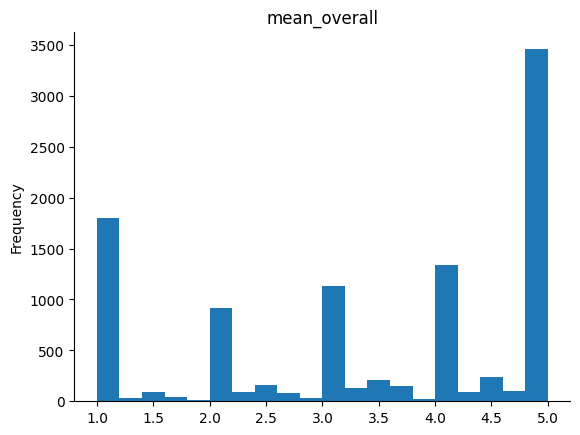

In [45]:
mean_overall['mean_overall'].plot(kind='hist', bins=20, title='mean_overall')
plt.gca().spines[['top', 'right',]].set_visible(False)